# Obtaining groundwater level monitoring data

Groundwater models are often calibrated using groundwater level monitoring data. This notebook demonstrates how to obtain groundwater level monitoring data from the yearbook sheets [published by the Kanton of Zurich](https://www.zh.ch/de/umwelt-tiere/wasser-gewaesser/messdaten/grundwasserstaende.html). 

## Download yearbook sheets & read daily data from pdfs
First we use the yearbook_extractor script to download the yearbook sheets and to extract the groundwater level monitoring data. This script downloads all available daily groundwater level data from 1970 until today. It may run several minutes. The extracted data is stored in a csv file in extracted_data/all_wells_long_format.csv.

In [ ]:
# Run python script to generate the data
# Uncomment the following line to run the script
!python3 ./yearbook_extractor.py

## First glimpse at the data
Now we plot the data to see if the extraction worked as desired. 

Starting search for project root from: /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src/scripts/scripts_limmat_data_preprocessing
Checking path: /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src/scripts/scripts_limmat_data_preprocessing
Marker file not found in /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src/scripts/scripts_limmat_data_preprocessing. Moving up...
Checking path: /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src/scripts
Marker file not found in /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src/scripts. Moving up...
Checking path: /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src
Marker file not found in /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO/src. Moving up...
Checking path: /Users/bea/Documents/GitHub/applied_groundwater_modelling/SUPPORT_REPO
Marker file not found in /Users/bea/Documents/

all_wells_long_format.csv:   0%|          | 0.00/7.88M [00:00<?, ?iB/s]

Download complete: /Users/bea/applied_groundwater_modelling_data/limmat/time_series/all_wells_long_format.csv


all_wells_long_format_readme.md:   0%|          | 0.00/608 [00:00<?, ?iB/s]

Download complete: /Users/bea/applied_groundwater_modelling_data/limmat/time_series/all_wells_long_format_readme.md


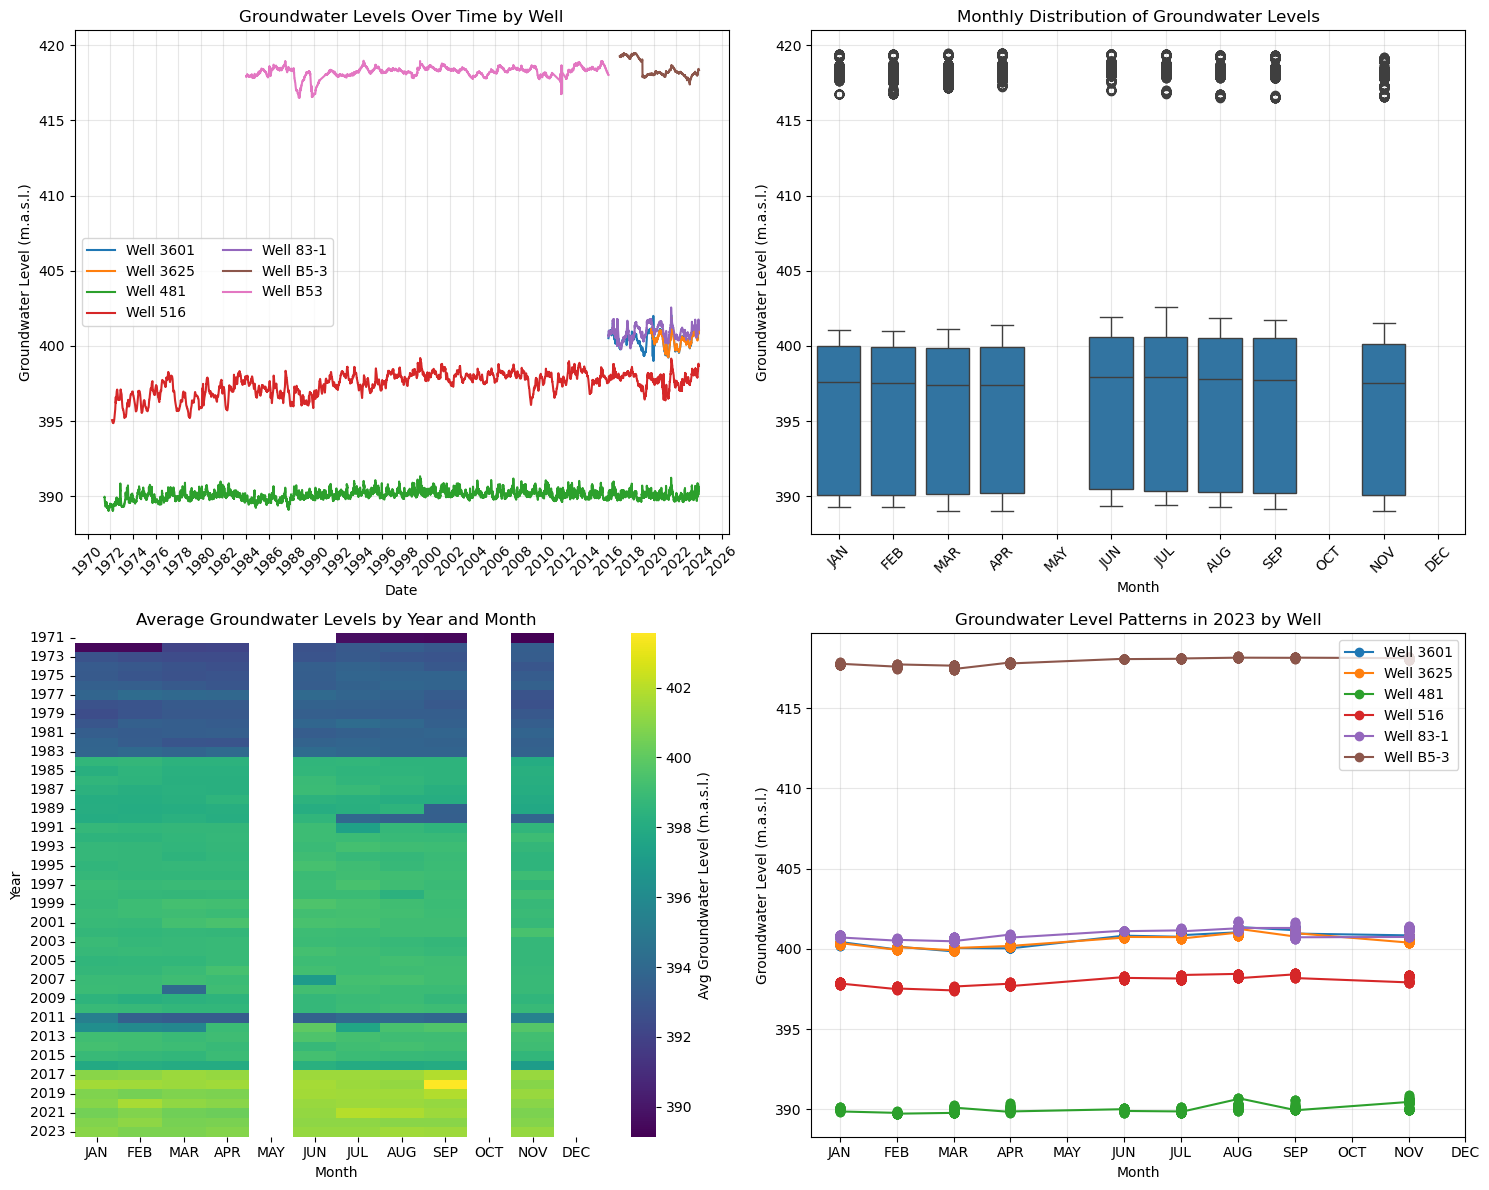

Statistical Summary by Well:
  well_id        mean     min     max       std  range
0    3601  400.423813  399.00  402.06  0.497463   3.06
1    3625  400.376895  399.25  401.92  0.477665   2.67
2     481  390.068386  389.04  391.34  0.292252   2.30
3     516  397.467461  394.87  399.20  0.754358   4.33
4    83-1  400.899645  399.78  402.56  0.442103   2.78
5    B5-3  418.422383  417.38  419.46  0.564373   2.08
6     B53  418.219251  416.50  418.96  0.363219   2.46


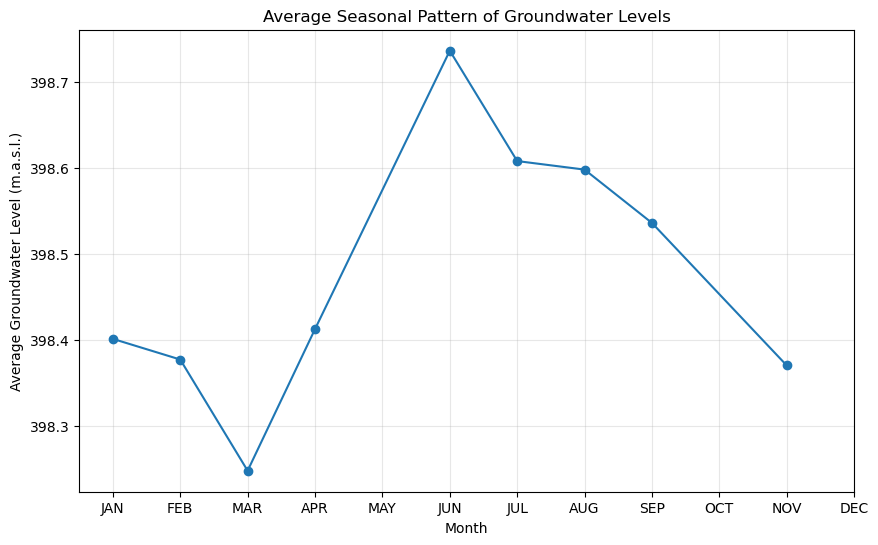

/var/folders/fx/fhbs7qgd6998fvtd5n8bs1lr0000gn/T/ipykernel_40685/4286858470.py:151: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts_data = ts_data.resample('M').mean()


<Figure size 1200x1000 with 0 Axes>

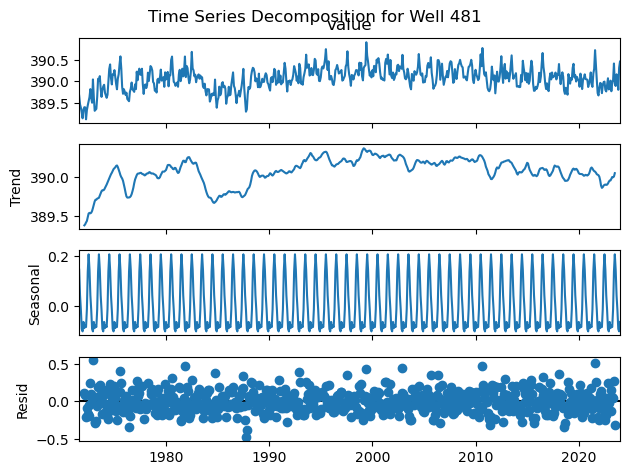


Periods with exceptionally low groundwater (below 10th percentile: 389.93 m):
  1971: JUL, AUG, SEP, NOV, OKT, DEZ
  1972: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1973: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1974: JAN, FEB, MAR, APR, AUG, SEP, MAI
  1975: JAN, FEB, MAR, APR, SEP, NOV, OKT, DEZ
  1976: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1977: JAN, FEB, MAR, SEP, NOV, OKT, DEZ
  1978: JAN, FEB, APR, AUG, SEP, NOV, OKT, DEZ
  1979: JAN, FEB, MAR, APR, JUL, AUG, NOV, MAI, OKT, DEZ
  1980: JAN, MAR, SEP, NOV, OKT, DEZ
  1981: JAN, FEB, MAR, AUG, NOV, MAI
  1982: MAR, APR, NOV, DEZ
  1983: JUN, JUL, AUG, SEP, NOV, OKT, DEZ
  1984: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1985: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1986: JAN, FEB, MAR, APR, JUN, JUL, AUG, SEP, NOV, MAI, OKT, DEZ
  1987: JAN, FEB, MAR, APR, JUL, AUG, SEP, NOV, OKT, DEZ
  1988: JAN, FEB, MAR, AUG, SEP, NOV, OKT
  198

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

# Read the groundwater data
# Uncomment the line below if run locally after running python yearbook_extractor.py
# groundwater_data = pd.read_csv('./extracted_data/all_wells_long_format.csv')

# Comment out if you have extracted your own data
import sys
from pathlib import Path
src_dir = (Path(__file__).resolve().parents[2]
           if '__file__' in globals() else Path.cwd().parents[1])
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))
from data_utils import download_named_file
gw_data_path = download_named_file(
    name='groundwater_timeseries',
    data_type='time_series'
)
# Import the data
groundwater_data = pd.read_csv(gw_data_path)

# Convert date string to datetime object for better plotting
groundwater_data['date'] = pd.to_datetime(groundwater_data['date'])

# Sort the data by well_id and date to ensure proper time series plotting
groundwater_data = groundwater_data.sort_values(['well_id', 'date'])

# Create a figure with multiple subplots
plt.figure(figsize=(15, 12))

# 1. Time series plot of groundwater levels by well
plt.subplot(2, 2, 1)
for well, data in groundwater_data.groupby('well_id'):
    # Ensure data is sorted by date within each well group
    data = data.sort_values('date')
    plt.plot(data['date'], data['value'], label=f'Well {well}', linewidth=1.5)

plt.xlabel('Date')
plt.ylabel('Groundwater Level (m.a.s.l.)')
plt.title('Groundwater Levels Over Time by Well')
plt.legend(loc='best', ncol=2)
plt.grid(True, alpha=0.3)
# Format x-axis to show years nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.xticks(rotation=45)

# 2. Monthly distribution of groundwater levels (boxplot)
plt.subplot(2, 2, 2)
# Convert month abbreviations to numbers for proper ordering
month_order = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
groundwater_data['month_num'] = groundwater_data['month'].map(month_order)
groundwater_data = groundwater_data.sort_values('month_num')

sns.boxplot(x='month', y='value', data=groundwater_data, 
            order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.xlabel('Month')
plt.ylabel('Groundwater Level (m.a.s.l.)')
plt.title('Monthly Distribution of Groundwater Levels')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. Heatmap of groundwater levels by year and month
plt.subplot(2, 2, 3)
# Extract available years from the data
years = sorted(groundwater_data['year'].unique())

# Create pivot table: years as rows, months as columns
heatmap_data = groundwater_data.groupby(['year', 'month_num'])['value'].mean().unstack()
# Ensure all months are present and in order
heatmap_data = heatmap_data.reindex(columns=range(1, 13))
# Rename columns from numbers to month names
month_names = {v: k for k, v in month_order.items()}
heatmap_data.columns = [month_names.get(i, i) for i in heatmap_data.columns]

# Plot heatmap
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".1f", 
            cbar_kws={'label': 'Avg Groundwater Level (m.a.s.l.)'})
plt.title('Average Groundwater Levels by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')

# 4. Comparing annual patterns for different wells
plt.subplot(2, 2, 4)
# Get the most recent full year of data
recent_year = groundwater_data['year'].max()
recent_data = groundwater_data[groundwater_data['year'] == recent_year]

for well, data in recent_data.groupby('well_id'):
    data = data.sort_values('month_num')
    plt.plot(data['month_num'], data['value'], marker='o', label=f'Well {well}')

plt.xticks(range(1, 13), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.xlabel('Month')
plt.ylabel('Groundwater Level (m.a.s.l.)')
plt.title(f'Groundwater Level Patterns in {recent_year} by Well')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.savefig('groundwater_visualization.png', dpi=300)
plt.show()

# Additional analysis: Statistical summary by well
well_stats = groundwater_data.groupby('well_id')['value'].agg([
    'mean', 'min', 'max', 'std'
]).reset_index()
well_stats['range'] = well_stats['max'] - well_stats['min']
print("Statistical Summary by Well:")
print(well_stats)

# Analyze seasonal patterns
# Group by month and calculate average, regardless of year
seasonal_pattern = groundwater_data.groupby('month_num')['value'].mean().reset_index()
seasonal_pattern['month'] = seasonal_pattern['month_num'].map(month_names)
seasonal_pattern = seasonal_pattern.sort_values('month_num')

plt.figure(figsize=(10, 6))
plt.plot(seasonal_pattern['month_num'], seasonal_pattern['value'], marker='o', linestyle='-')
plt.xticks(range(1, 13), ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                          'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.xlabel('Month')
plt.ylabel('Average Groundwater Level (m.a.s.l.)')
plt.title('Average Seasonal Pattern of Groundwater Levels')
plt.grid(True, alpha=0.3)
plt.savefig('seasonal_pattern.png', dpi=300)
plt.show()

# Time series decomposition for trend analysis
# If you have statsmodels installed
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    # Select a single well with the most complete data
    well_with_most_data = groundwater_data.groupby('well_id').size().idxmax()
    single_well_data = groundwater_data[groundwater_data['well_id'] == well_with_most_data].sort_values('date')
    
    # Set the date as index and resample to ensure regular time intervals (monthly)
    ts_data = single_well_data.set_index('date')['value']
    ts_data = ts_data.resample('M').mean()
    
    # Fill missing values if any (linear interpolation)
    ts_data = ts_data.interpolate()
    
    # Decompose the time series
    result = seasonal_decompose(ts_data, model='additive', period=12)
    
    # Plot the decomposition
    plt.figure(figsize=(12, 10))
    result.plot()
    plt.suptitle(f'Time Series Decomposition for Well {well_with_most_data}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig('time_series_decomposition.png', dpi=300)
    plt.show()
except ImportError:
    print("Note: statsmodels package not available for time series decomposition.")

# Create a function to analyze specific events like drought periods or heavy rainfall
def analyze_extreme_periods(data, threshold_low, threshold_high):
    """
    Identify periods where groundwater levels were extremely low or high
    
    Parameters:
    - data: DataFrame with groundwater data
    - threshold_low: percentile defining low groundwater (e.g., 10 for 10th percentile)
    - threshold_high: percentile defining high groundwater (e.g., 90 for 90th percentile)
    """
    low_value = np.percentile(data['value'], threshold_low)
    high_value = np.percentile(data['value'], threshold_high)
    
    low_periods = data[data['value'] <= low_value]
    high_periods = data[data['value'] >= high_value]
    
    print(f"\nPeriods with exceptionally low groundwater (below {threshold_low}th percentile: {low_value:.2f} m):")
    for year, group in low_periods.groupby('year'):
        months = group['month'].unique()
        print(f"  {year}: {', '.join(months)}")
    
    print(f"\nPeriods with exceptionally high groundwater (above {threshold_high}th percentile: {high_value:.2f} m):")
    for year, group in high_periods.groupby('year'):
        months = group['month'].unique()
        print(f"  {year}: {', '.join(months)}")

# Call the function to analyze extreme periods
analyze_extreme_periods(groundwater_data, 10, 90)

Data with ID B5-3 and B53 are obviously from the same well. 